In [5]:
"""

Data Science Notebook

Authors: Tolu Ibiwoye

This notebook contains all the code used to make the basketball performance script
File names used when creating the scripts are given.

"""


'\n\nData Science Notebook\n\nAuthors: Tolu Ibiwoye\n\nThis notebook contains all the code used to make the basketball performance script\nFile names used when creating the scripts are given.\n\n'

In [6]:
"""

Name: Cleaning.ipynb

Description: Cleaning script, takes unfiltered Execel file, removes empty entries, and saves the cleaned dataset to a  new CSV

Note: This script requires a Execel file to be loaded, which is not supplied due to the size of the file.
      As the csv file is already processed, this script can be skipped.

"""

'\n\nName: Cleaning.ipynb\n\nDescription: Cleaning script, takes unfiltered Execel file, removes empty entries, and saves the cleaned dataset to a  new CSV\n\nNote: This script requires a Execel file to be loaded, which is not supplied due to the size of the file.\n      As the csv file is already processed, this script can be skipped.\n\n'

In [7]:
import pandas as pd

def process_csv(filename):
    # Load the dataset
    df = pd.read_csv(filename)

    # Print the length of the DataFrame
    print("Length of the dataset:", len(df))

    # Print the first row of the DataFrame
    print("\nFirst row of the dataset:")
    print(df.iloc[0])

    return df

In [8]:
"""

Name: merging.ipynb

Description: This is intended to merge the two datasets to get a detailed single dataset with the required fields

"""

'\n\nName: merging.ipynb\n\nDescription: This is intended to merge the two datasets to get a detailed single dataset with the required fields\n\n'

In [ ]:
import pandas as pd

# Specify the filename
filename = 'C:/archive/boxscore.csv'

# Call the function with the specified filename and store the returned DataFrame in 'df'
df = process_csv(filename)

# Print the first 23 rows before cleaning
print("\nBefore Cleaning:")
print(df.head(23))

# 1. Remove entries with no value in the "Per" column
df = df[pd.notna(df['PER'])]

# 2. Remove entries with "#VALUE!" in the "Per" column
df = df[df['PER'] != '#VALUE!']

# 3. Remove entries with "Player Suspended" or "Did Not Play" in the "MP" column
df = df[~df['FGA'].isin(['Player Suspended', 'Did Not Play', 'Not With Team', 'Did Not Dress'])]

# Print the first 23 rows after cleaning
print("\nAfter Cleaning:")
print(df.head(23))


Length of the dataset: 613303

First row of the dataset:
game_id                        1
teamName        Sacramento Kings
playerName    Corliss Williamson
MP                      37:20:00
FG                             7
FGA                           11
3P                             0
3PA                            0
FT                             0
FTA                            0
ORB                            1
DRB                            3
TRB                            4
AST                            4
STL                            1
BLK                            1
TOV                            4
PF                             5
PTS                           14
+/-                         -2.0
isStarter                      1
FGM                            4
FTM                            0
PER                           16
Pos_x                          F
Pos_y                          F
Pos                            F
Name: 0, dtype: object

Before Cleaning:
    game_id

In [ ]:
# Save the cleaned data back to boxscore.csv
df.to_csv(filename, index=False)

C:\Users\unumuser\AppData\Local\Temp\ipykernel_20060\2861234923.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lebron_df['PER'] = pd.to_numeric(lebron_df['PER'], errors='coerce')
C:\Users\unumuser\AppData\Local\Temp\ipykernel_20060\2861234923.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lebron_df['FG'] = pd.to_numeric(lebron_df['FG'], errors='coerce')
C:\Users\unumuser\AppData\Local\Temp\ipykernel_20060\2861234923.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

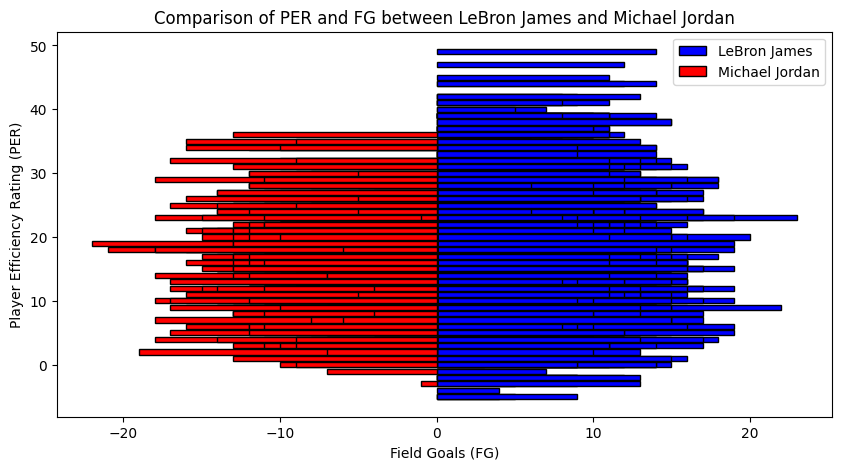

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('C:/archive/boxscore.csv')

# Filter the dataset for LeBron James and Michael Jordan
lebron_df = df[df['playerName'] == 'LeBron James']
mj_df = df[df['playerName'] == 'Michael Jordan']

# Convert the 'PER' and 'FG' columns to numeric (if they are not already)
lebron_df['PER'] = pd.to_numeric(lebron_df['PER'], errors='coerce')
lebron_df['FG'] = pd.to_numeric(lebron_df['FG'], errors='coerce')
mj_df['PER'] = pd.to_numeric(mj_df['PER'], errors='coerce')
mj_df['FG'] = pd.to_numeric(mj_df['FG'], errors='coerce')

# Sort the DataFrames by 'PER' to ensure the graph is correct
lebron_df = lebron_df.sort_values(by='PER')
mj_df = mj_df.sort_values(by='PER')

# Create a population pyramid type graph
plt.figure(figsize=(10, 5))

plt.barh(lebron_df['PER'], lebron_df['FG'], color='blue', label='LeBron James', edgecolor='black')
plt.barh(mj_df['PER'], -mj_df['FG'], color='red', label='Michael Jordan', edgecolor='black')

# Adding labels and title
plt.xlabel('Field Goals (FG)')
plt.ylabel('Player Efficiency Rating (PER)')
plt.title('Comparison of PER and FG between LeBron James and Michael Jordan')
plt.legend()

# Show the plot
plt.show()

C:\Users\unumuser\AppData\Local\Temp\ipykernel_20060\4217718123.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  steph_df['PER'] = pd.to_numeric(steph_df['PER'], errors='coerce')
C:\Users\unumuser\AppData\Local\Temp\ipykernel_20060\4217718123.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  steph_df['FG'] = pd.to_numeric(steph_df['FG'], errors='coerce')
C:\Users\unumuser\AppData\Local\Temp\ipykernel_20060\4217718123.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

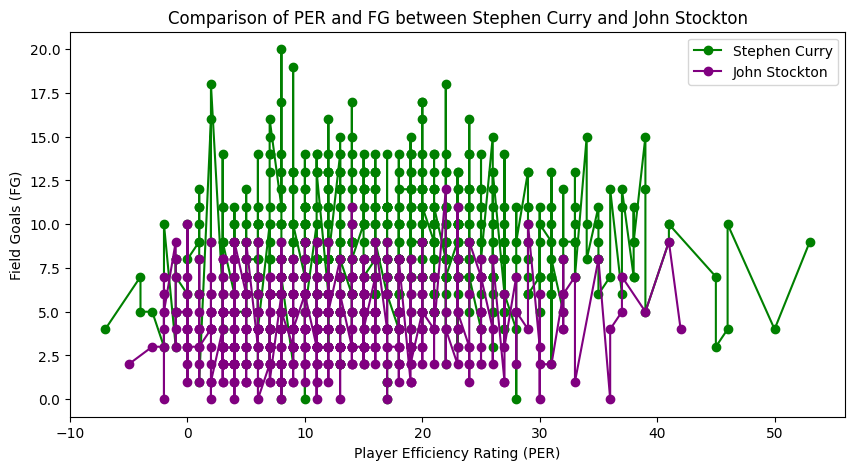

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('C:/archive/boxscore.csv')

# Filter the dataset for LeBron James and Michael Jordan
steph_df = df[df['playerName'] == 'Stephen Curry']
johnstock_df = df[df['playerName'] == 'John Stockton']

# Convert the 'PER' and 'FG' columns to numeric (if they are not already)
steph_df['PER'] = pd.to_numeric(steph_df['PER'], errors='coerce')
steph_df['FG'] = pd.to_numeric(steph_df['FG'], errors='coerce')
johnstock_df['PER'] = pd.to_numeric(johnstock_df['PER'], errors='coerce')
johnstock_df['FG'] = pd.to_numeric(johnstock_df['FG'], errors='coerce')

# Sort the DataFrames by 'PER' to ensure the line graph is correct
steph_df = steph_df.sort_values(by='PER')
johnstock_df = johnstock_df.sort_values(by='PER')

# Create a line graph
plt.figure(figsize=(10, 5))
plt.plot(steph_df['PER'], steph_df['FG'], color='green', label='Stephen Curry', linestyle='-', marker='o')
plt.plot(johnstock_df['PER'], johnstock_df['FG'], color='purple', label='John Stockton', linestyle='-', marker='o')

# Adding labels and title
plt.xlabel('Player Efficiency Rating (PER)')
plt.ylabel('Field Goals (FG)')
plt.title('Comparison of PER and FG between Stephen Curry and John Stockton')
plt.legend()

# Show the plot
plt.show()

In [ ]:
"""
Description: Finding the best player in Each position

"""

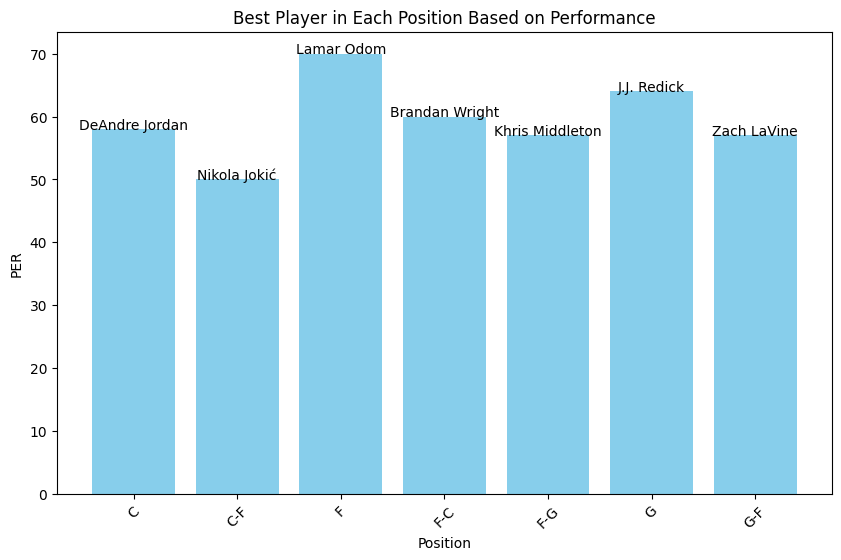

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('C:/archive/boxscore.csv')

# Assuming 'Pos_x' is the column with position information and 'PER' is already numeric
# Find the index of the player with the highest 'PER' in each position
best_players_idx = df.groupby('Pos_x')['PER'].idxmax()

# Subset the original DataFrame to get only the best players
best_players = df.loc[best_players_idx]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(best_players['Pos_x'], best_players['PER'], color='skyblue')

# Annotate each bar with the player's name
for index, row in best_players.iterrows():
    plt.text(row['Pos_x'], row['PER'], row['playerName'], ha='center')

# Adding labels and title
plt.xlabel('Position')
plt.ylabel('PER')
plt.title('Most Efficient Player in Each Position Based on PER')
plt.xticks(rotation=45)  # Rotating position labels for better readability

# Show the plot
plt.show()

In [ ]:
"""
Description: Finding the best player in Each team

"""

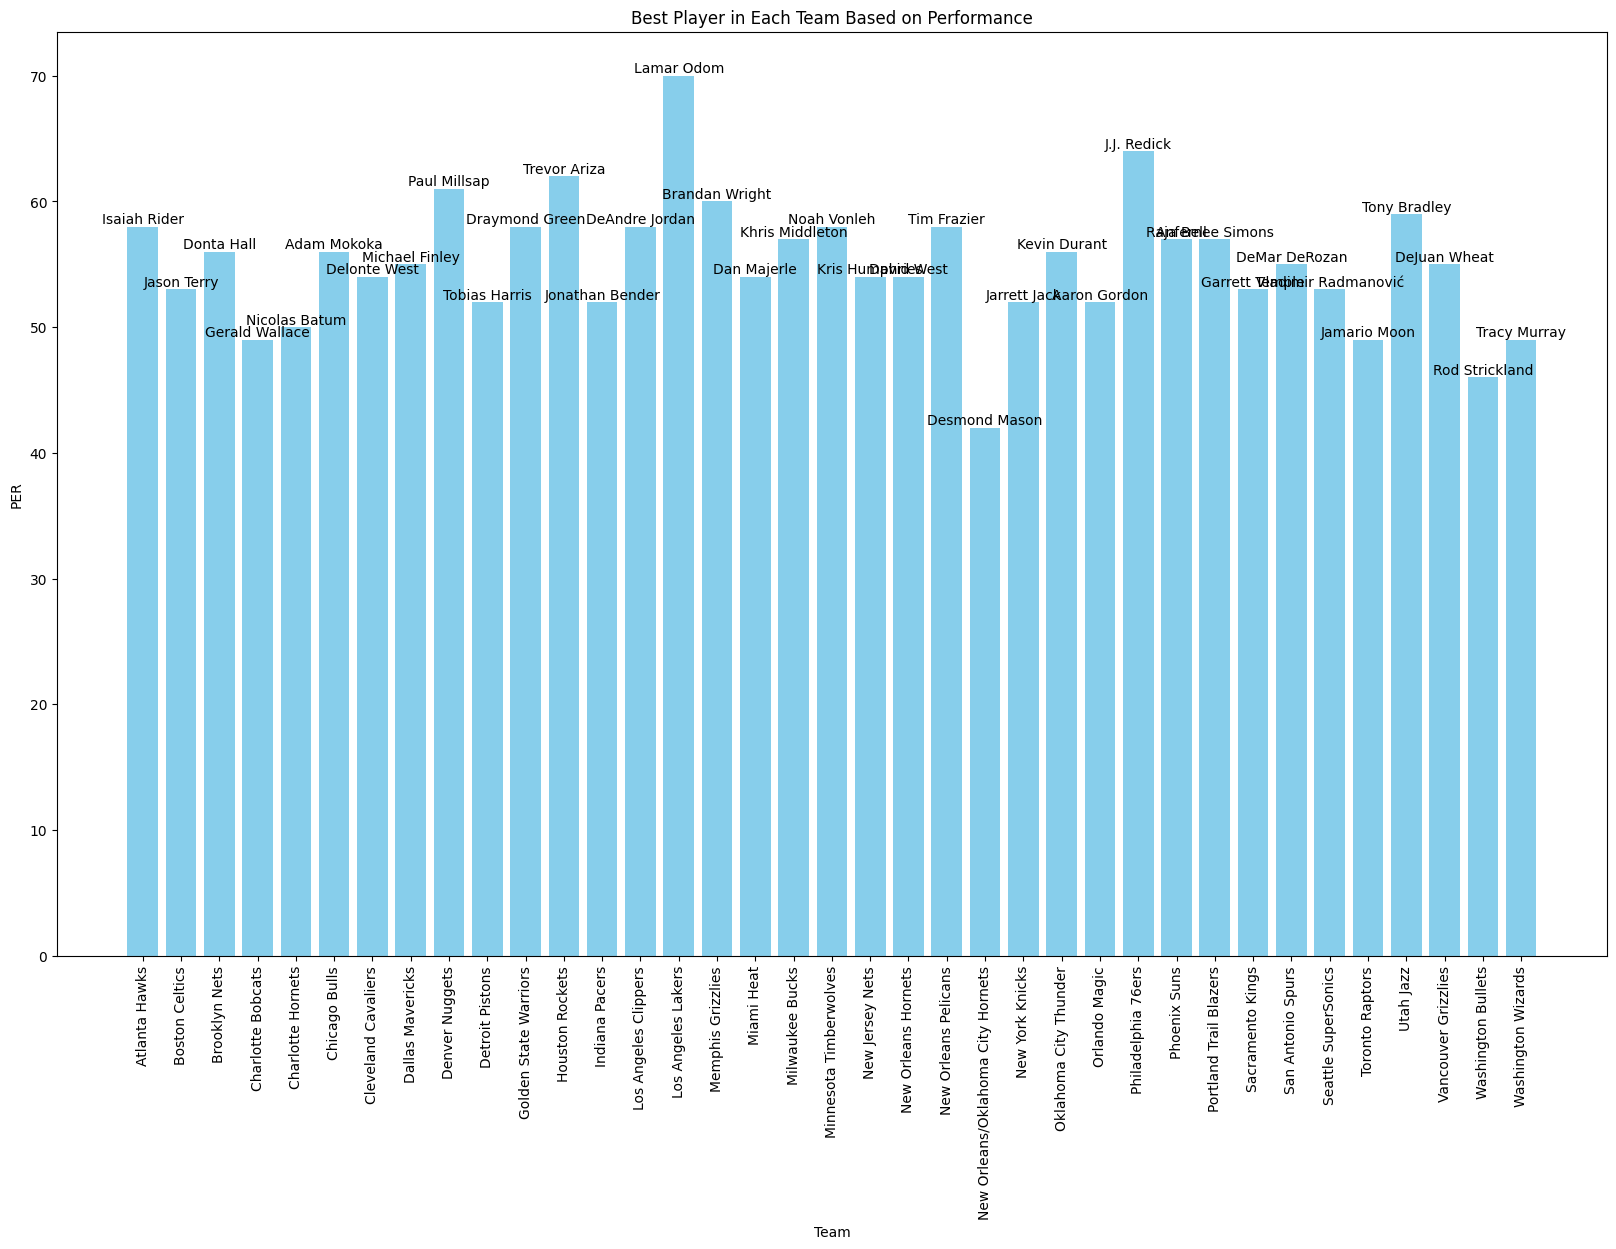

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('C:/archive/boxscore.csv')

# Assuming 'Team' is the column with team information and 'PER' is already numeric
# Find the index of the player with the highest 'PER' in each team
best_players_idx = df.groupby('teamName')['PER'].idxmax()

# Subset the original DataFrame to get only the best players
best_players = df.loc[best_players_idx]

# Plotting
plt.figure(figsize=(20, 12))
plt.bar(best_players['teamName'], best_players['PER'], color='skyblue')

# Annotate each bar with the player's name
for index, row in best_players.iterrows():
    plt.text(row['teamName'], row['PER'], row['playerName'], ha='center', va='bottom')

# Adding labels and title
plt.xlabel('Team')
plt.ylabel('PER')
plt.title('Most Efficient Player in Each Team Based on PER')
plt.xticks(rotation=90)  # Rotating team labels for better readability

# Show the plot
plt.show()

C:\Users\unumuser\AppData\Local\Temp\ipykernel_16844\2604086221.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shaq_df['PER'] = pd.to_numeric(shaq_df['PER'], errors='coerce')
C:\Users\unumuser\AppData\Local\Temp\ipykernel_16844\2604086221.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shaq_df['FG'] = pd.to_numeric(shaq_df['FG'], errors='coerce')
C:\Users\unumuser\AppData\Local\Temp\ipykernel_16844\2604086221.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

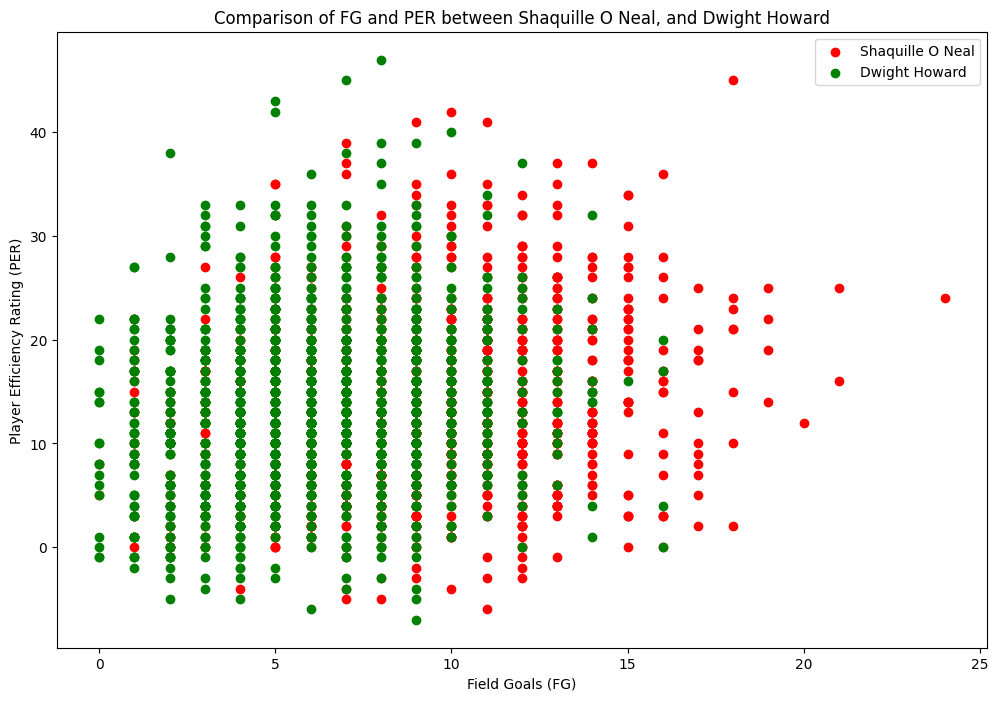

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('C:/archive/boxscore.csv')

# Filter the dataset for Shaquille O'Neal, and Dwight Howard
shaq_df = df[df['playerName'] == 'Shaquille O\'Neal']  # Assuming this is how his name is spelled in the dataset
howard_df = df[df['playerName'] == 'Dwight Howard']

# Convert the 'PER' and 'FG' columns to numeric (if they are not already)
shaq_df['PER'] = pd.to_numeric(shaq_df['PER'], errors='coerce')
shaq_df['FG'] = pd.to_numeric(shaq_df['FG'], errors='coerce')
howard_df['PER'] = pd.to_numeric(howard_df['PER'], errors='coerce')
howard_df['FG'] = pd.to_numeric(howard_df['FG'], errors='coerce')

# Create a scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(shaq_df['FG'], shaq_df['PER'], color='red', label='Shaquille O Neal')
plt.scatter(howard_df['FG'], howard_df['PER'], color='green', label='Dwight Howard')

# Adding labels and title
plt.xlabel('Field Goals (FG)')
plt.ylabel('Player Efficiency Rating (PER)')
plt.title('Comparison of FG and PER between Shaquille O Neal, and Dwight Howard')
plt.legend()

# Show the plot
plt.show()

In [ ]:
"""
Description: Comparing Giannis, Tim Duncan, Kevin Garnett

"""

C:\Users\unumuser\AppData\Local\Temp\ipykernel_16844\2200215805.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  giannis_df['PER'] = pd.to_numeric(giannis_df['PER'], errors='coerce')
C:\Users\unumuser\AppData\Local\Temp\ipykernel_16844\2200215805.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  giannis_df['FG'] = pd.to_numeric(giannis_df['FG'], errors='coerce')
C:\Users\unumuser\AppData\Local\Temp\ipykernel_16844\2200215805.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

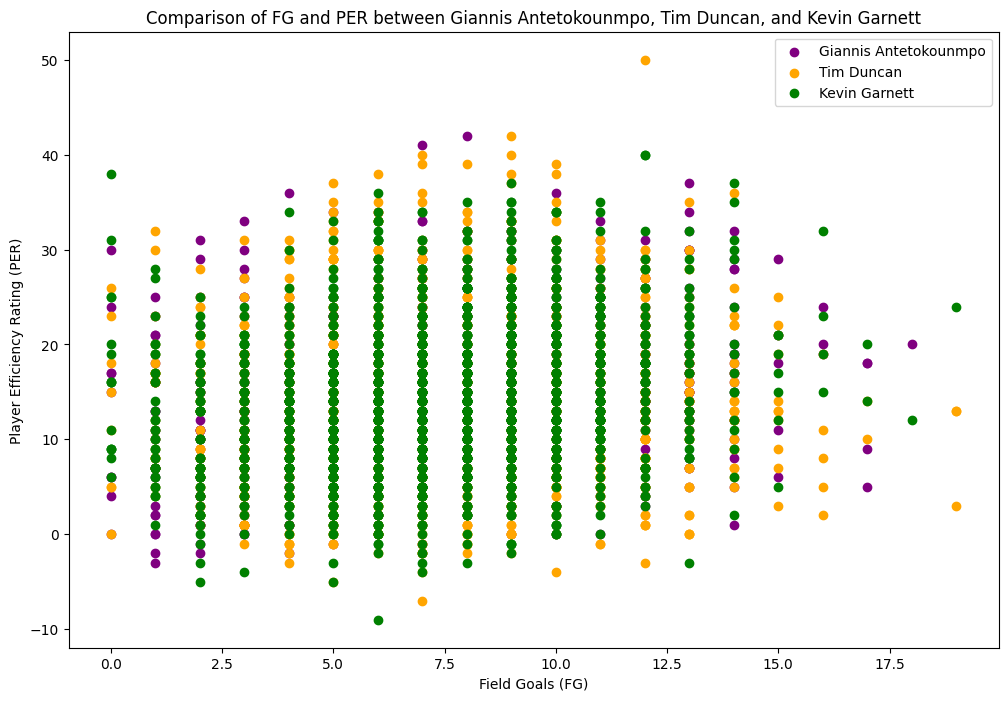

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('C:/archive/boxscore.csv')

# Filter the dataset for Giannis Antetokounmpo, Tim Duncan, and Kevin Garnett
giannis_df = df[df['playerName'] == 'Giannis Antetokounmpo']
duncan_df = df[df['playerName'] == 'Tim Duncan']  # Assuming this is how his name is spelled in your dataset
garnett_df = df[df['playerName'] == 'Kevin Garnett']

# Convert the 'PER' and 'FG' columns to numeric (if they are not already)
giannis_df['PER'] = pd.to_numeric(giannis_df['PER'], errors='coerce')
giannis_df['FG'] = pd.to_numeric(giannis_df['FG'], errors='coerce')
duncan_df['PER'] = pd.to_numeric(duncan_df['PER'], errors='coerce')
duncan_df['FG'] = pd.to_numeric(duncan_df['FG'], errors='coerce')
garnett_df['PER'] = pd.to_numeric(garnett_df['PER'], errors='coerce')
garnett_df['FG'] = pd.to_numeric(garnett_df['FG'], errors='coerce')

# Create a scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(giannis_df['FG'], giannis_df['PER'], color='purple', label='Giannis Antetokounmpo')
plt.scatter(duncan_df['FG'], duncan_df['PER'], color='orange', label='Tim Duncan')
plt.scatter(garnett_df['FG'], garnett_df['PER'], color='green', label='Kevin Garnett')

# Adding labels and title
plt.xlabel('Field Goals (FG)')
plt.ylabel('Player Efficiency Rating (PER)')
plt.title('Comparison of FG and PER between Giannis Antetokounmpo, Tim Duncan, and Kevin Garnett')
plt.legend()

# Show the plot
plt.show()

In [ ]:
"""
Description: Comparing Kobe Vs Harden

"""

C:\Users\unumuser\AppData\Local\Temp\ipykernel_16844\505932102.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kobe_df['PER'] = pd.to_numeric(kobe_df['PER'], errors='coerce')
C:\Users\unumuser\AppData\Local\Temp\ipykernel_16844\505932102.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kobe_df['FG'] = pd.to_numeric(kobe_df['FG'], errors='coerce')
C:\Users\unumuser\AppData\Local\Temp\ipykernel_16844\505932102.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

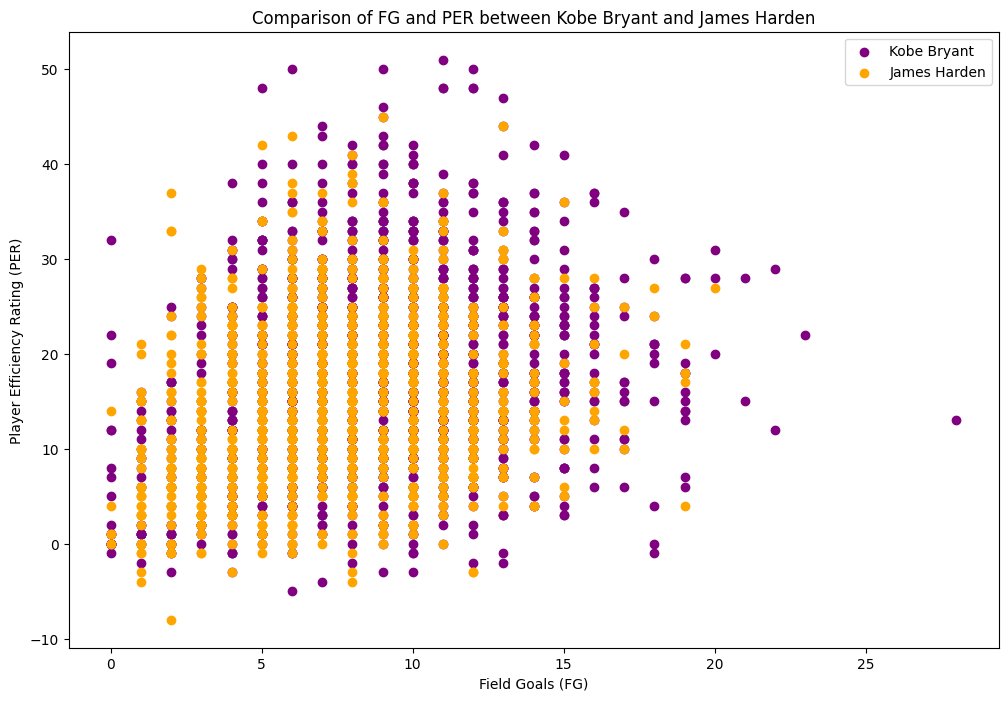

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('C:/archive/boxscore.csv')

# Filter the dataset for Kobe Bryant and James Harden
kobe_df = df[df['playerName'] == 'Kobe Bryant']
harden_df = df[df['playerName'] == 'James Harden']

# Convert the 'PER' and 'FG' columns to numeric (if they are not already)
kobe_df['PER'] = pd.to_numeric(kobe_df['PER'], errors='coerce')
kobe_df['FG'] = pd.to_numeric(kobe_df['FG'], errors='coerce')
harden_df['PER'] = pd.to_numeric(harden_df['PER'], errors='coerce')
harden_df['FG'] = pd.to_numeric(harden_df['FG'], errors='coerce')

# Create a scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(kobe_df['FG'], kobe_df['PER'], color='purple', label='Kobe Bryant')
plt.scatter(harden_df['FG'], harden_df['PER'], color='orange', label='James Harden')

# Adding labels and title
plt.xlabel('Field Goals (FG)')
plt.ylabel('Player Efficiency Rating (PER)')
plt.title('Comparison of FG and PER between Kobe Bryant and James Harden')
plt.legend()

# Show the plot
plt.show()